<a href="https://colab.research.google.com/github/J-Isaula/Catalogo-de-App-Shiny-R/blob/main/Finance_Python_Clas1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Session 1:** 

Test de Jarque-Bera aplicado a datos de mercado.

In [4]:
# Librerias --------------------------------------------------------------

import numpy as np
import pandas as pd
import matplotlib as mpl
import scipy 
import importlib
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis,chi2
plt.style.use('ggplot') 
import seaborn as sns
import yfinance as yf  # pip install -U --force-reinstall yfinance

In [5]:
# Extracion de los datos --- Fuente: Yahoo Finance
start = "1980-08-18"
end   = "2022-08-18"
data  = yf.download("DBK.DE",start, end)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Anexamos a los datos, los rendimientos
data["Close_previo"]        = data["Close"].shift(1)
data["rendimientos_close"]  = data["Close"]/data["Close_previo"]-1
data                        = data.dropna()
data

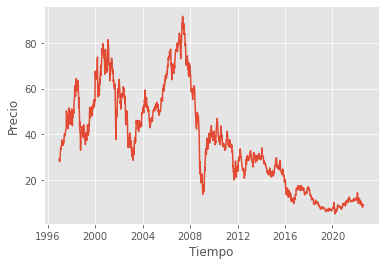

In [21]:
# Plot de Precios 
plt.figure()
plt.plot(data["Close"])
plt.xlabel("Tiempo")
plt.ylabel("Precio")
plt.show()

In [22]:
# Input para Test Jarque-Bera
x     = data["rendimientos_close"]
x_tam = len(x)

In [23]:
# Computo "Metricas de Riesgo" 
x_mean    = np.mean(x)
x_stdev   = np.std(x)
x_skew    = skew(x)
x_kurt    = kurtosis(x)
x_sharpe  = x_mean/x_stdev*np.sqrt(252)
x_var_95  = np.percentile(x,5) 
x_cvar_95 = np.mean(x[x <= x_var_95])
x_JB      = x_tam/6*(x_skew**2 + 1/4*x_kurt**2)
p_value   = 1 - chi2.cdf(x_JB,df = 2)
is_normal = (p_value > 0.05)
# 

In [24]:
# Output "Metricas de Riesgo"
print('-----------------------------------------------')
print('media: \t\t\t'    + str(x_mean))
print('std: \t\t\t'      + str(x_stdev))
print('skewness: \t\t'   + str(x_skew))
print('kurtosis: \t\t'   + str(x_kurt))
print('Cof_Sharpe: \t\t' + str(x_sharpe))
print('VaR 95%: \t\t'    + str(x_var_95))
print('CVarR 95%: \t\t'  + str(x_cvar_95))
print('Jarque-Bera:\t\t' + str(x_JB))
print('p-value: \t\t'    + str(p_value))
print('Es_normal: \t\t'  + str(is_normal))
print('-----------------------------------------------')

-----------------------------------------------
media: 			0.00038828525791448473
std: 			0.04067176536972503
skewness: 		-2.7000527291982177
kurtosis: 		18.1756429343783
Cof_Sharpe: 		0.1515507705439804
VaR 95%: 		-0.0750171763254364
CVarR 95%: 		-0.1262272569927085
Jarque-Bera:		33839.36208562294
p-value: 		0.0
Es_normal: 		False
-----------------------------------------------


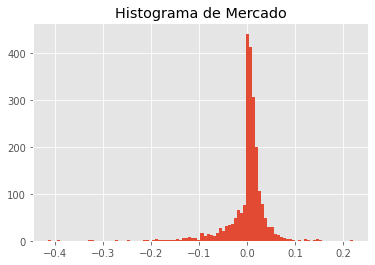

In [25]:
# Plot Histograma
plt.figure()
plt.hist(x,bins = 100)
plt.title("Histograma de Mercado")
plt.show()